some_digit
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 131 225
 225 225   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  13  73 197 253 252 252 252 252   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   4  29  29 154 187 252 252 253
 252 252 233 145   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  29 252 253 252 252 252 252 253

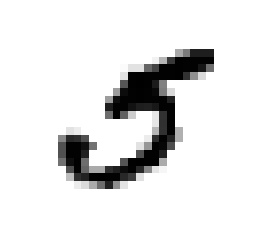

shuffle_indx [51140 31960 51260 ..., 20558 25340  6348]
len(shuffle_index) 60000
type(shuffle_index) <class 'numpy.ndarray'>
y_train_5
[False  True False ..., False False False]
y_train
[ 8.  5.  8. ...,  3.  4.  1.]
[ True]


In [14]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[36000]
print('some_digit')
print(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

#split the test set and train set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000],y[60000:]


import numpy as np
#产生60000个随机数，范围在0-60000里边
shuffle_index = np.random.permutation(60000)
print('shuffle_indx',shuffle_index)
print('len(shuffle_index)',len(shuffle_index))
print('type(shuffle_index)',type(shuffle_index))
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#y=5 classifier
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
print('y_train_5')
print(y_train_5)
print('y_train')
print(y_train)
y_test_5 = (y_test == 5)

#train it on the whole training set
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

#                                   TIP
#The SGDClassifier relies on randomness during training (hence the name
#“stochastic”). If you want reproducible results, you should set the random_state
#parameter.

print(sgd_clf.predict([some_digit]))







#                             IMPLEMENTING CROSS-VALIDATION
Occasionally you will need more control over the cross-validation process than what
cross_val_score() and similar functions provide. In these cases, you can implement
cross-validation yourself; it is actually fairly straightforward. The following code does
roughly the same thing as the preceding cross_val_score() code, and prints the same
:    result:
        
    from sklearn.model_selection import StratifiedKFold
    from sklearn.base import clone
    skfolds = StratifiedKFold(n_splits=3, random_state=42)
    for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495
The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to
produce folds that contain a representative ratio of each class. At each iteration the
code creates a clone of the classifier, trains that clone on the training folds, and makes
predictions on the test fold. Then it counts the number of correct predictions and
outputs the ratio of correct predictions.

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    print(len(y_pred))
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

20000
0.96715
20000
0.9584
20000
0.9629


# meaure the perf of the model
# using cross_validation to measure the accuracy
:    from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")



In [16]:
#Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(len(y_train_pred))
print(y_train_pred)

60000
[False False False ..., False False False]


# Confusing Matrix 

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53796,   783],
       [ 1448,  3973]])

# Precision and Recall Score

In [18]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1307)
print(len(y_train_pred))
print(y_train_pred)
print(precision_score(y_train_5, y_train_pred))
recall_score(y_train_5, y_train_pred) # == 4344 / (4344 + 1077)

60000
[False False False ..., False False False]
0.835365853659


0.73289061058845228

# F1 score is used to evluate both the precise and recall number. only when both of this 2 parm are high, the f1 will be high

In [19]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.78078019062592119

## Precision/Recall Tradeoff
To understand this tradeoff, let’s look at how the SGDClassifier makes its
classification decisions. For each instance, it computes a score based on a
decision function, and if that score is greater than a threshold, it assigns the
instance to the positive class, or else it assigns it to the negative class
:    
    Scikit-Learn does not let you set the threshold directly, but it does give you
access to the decision scores that it uses to make predictions. Instead of calling
the classifier’s predict() method, you can call its decision_function()
method, which returns a score for each instance, and then make predictions
based on those scores using any threshold you want:

In [20]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ 100289.6200381]
[ True]


## Different threshold can have effect on both the precise and recall number, thus have impact on the model's performance. We need to have a way to calculate and determine a best value of threshold

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")
#          cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
print(y_scores)

[ -92120.1649076  -168854.0292552  -456248.44415277 ..., -521272.24950789
 -280194.93071527 -393937.03888495]


## 下面使用 precision_recall_curve() 函数来计算precision and recall for all possible thresholds

In [22]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

## 将上面得到的数值化成曲线：

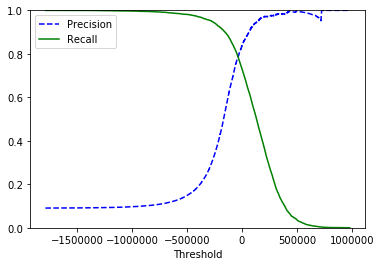

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

## 或者，直接使用precision 和 recall的数值来画线

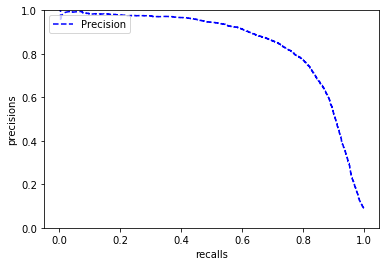

In [24]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b--", label="Precision")
    plt.xlabel("recalls")
    plt.ylabel("precisions")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_vs_recall(precisions, recalls)
plt.show()

## 1. 首先选定了我的目标是精确度达到90%
>2. 在第一个曲线上面找到90%对应的THRESHOLD = 70000
>3. 将THRESHOLD = 70000带回到这里计算

In [25]:


y_train_pred_90 = (y_scores > 70000)
print(len(y_train_pred_90))
precision_score(y_train_5, y_train_pred_90)
recall_score(y_train_5, y_train_pred_90)
print('y_train_pred_90 ',y_train_pred_90 )
print('precision_score(y_train_5, y_train_pred_90)', precision_score(y_train_5, y_train_pred_90))
print('recall_score(y_train_5, y_train_pred_90)',recall_score(y_train_5, y_train_pred_90))

60000
y_train_pred_90  [False False False ..., False False False]
precision_score(y_train_5, y_train_pred_90) 0.9050067659
recall_score(y_train_5, y_train_pred_90) 0.616860357868


# The ROC Curve

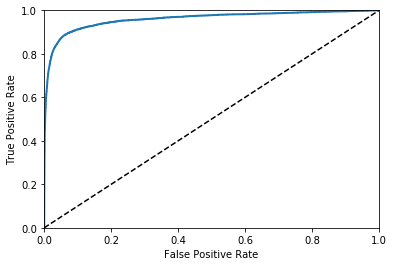

In [26]:
from sklearn.metrics import roc_curve
#tpr: true postive rate  fpr:false postive rate
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
#from sklearn.metrics import precision_recall_curve
#precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

#画图
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()


# 比较randomforests 和当前的 SGDClassifier模型的优劣
     
>Let’s train a RandomForestClassifier and compare its ROC curve and ROC
AUC score to the SGDClassifier. First, you need to get scores for each
instance in the training set. But due to the way it works (see Chapter 7), the
RandomForestClassifier class does not have a decision_function()
method. Instead it has a predict_proba() method. Scikit-Learn classifiers
generally have one or the other. The predict_proba() method returns an
array containing a row per instance and a column per class, each containing the
probability that the given instance belongs to the given class (e.g., 70% chance
that the image represents a 5):

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")
print(y_probas_forest)


[[ 1.   0. ]
 [ 0.3  0.7]
 [ 0.9  0.1]
 ..., 
 [ 0.6  0.4]
 [ 0.9  0.1]
 [ 1.   0. ]]


## But to plot a ROC curve, you need scores, not probabilities. A simple solutionis to use the positive class’s probability as the score:

In [28]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
#选择y_probas_forest结果里边的第一列
print(len(y_scores_forest))
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


60000


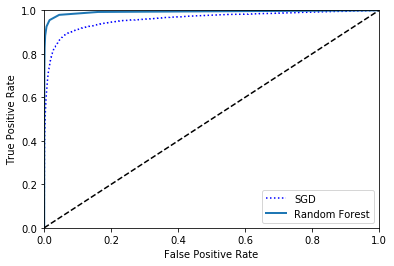

In [29]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [30]:
precisions_f, recalls_f, thresholds_f = precision_recall_curve(y_train_5,y_scores_forest)
print('precisions_f: ',len(precisions_f))
print('recalls_f: ',recalls_f)
print('thresholds_f: ',thresholds_f)

precisions_f:  12
recalls_f:  [ 1.          0.99262129  0.97933961  0.95517432  0.92584394  0.88341634
  0.82696919  0.742114    0.63825862  0.49308246  0.27541044  0.        ]
thresholds_f:  [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


In [31]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores_forest))

#要计算precision_score & recall_score
#需要先做预测，得到了预测结果之后，再带入上述两个函数进行计算
#

from sklearn.model_selection import cross_val_predict
y_train_pred_f = cross_val_predict(forest_clf, X_train, y_train_5, cv=6)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred_f) # == 4344 / (4344 + 1307)
print('precision')
print(precision_score(y_train_5, y_train_pred_f))

recall_score(y_train_5, y_train_pred_f)
print('recall')
print(recall_score(y_train_5, y_train_pred_f))

0.992793996963
precision
0.985019539731
recall
0.836930455635


# Multiclass Classification

In [32]:
sgd_clf.fit(X_train, y_train)
print(sgd_clf.predict([some_digit]))
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)
#some_digit_scores最高的那个就是我们当前的模型预测的结果（模型认为正确的结果）
np.argmax(some_digit_scores)

[ 5.]
[[-167176.03674422 -391000.17179746 -351616.20403415 -181807.87096415
  -654562.61614342  100289.6200381  -701073.56221759 -387500.89107867
  -761981.33213308 -718631.6451401 ]]


5

# WARNING
When a classifier is trained, it stores the list of target classes in its classes_
attribute, ordered by value. In this case, the index of each class in the classes_
array conveniently matches the class itself (e.g., the class at index 5 happens to
be class 5), but in general you won’t be so lucky


In [33]:
#找到scores值最大的那个对象的index数字
np.argmax(some_digit_scores)
#列出目前的模型里边的所有可能的label(classes)
sgd_clf.classes_
#使用第一行代码得出的index值，导入上面这个数组，得出当前预测到的数值
sgd_clf.classes_[np.argmax(some_digit_scores)]

5.0

In [34]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

print(ovo_clf.predict([some_digit]))

[ 5.]


## Use Random forestor to do the predict 

In [35]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])
#the list of probabilities that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

## Evluate the accuracy of the model using cross_val_score() function

In [36]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=5, scoring="accuracy")
#cv的数值决定了上面这个函数的输出数组中有几个数值，也就是将原来的trainning set分成多少份
#比如分为5份，那么cross validation 将会随机的将trainning set分为5份，然后trains and evaluates the
#model 5 次，每一次选一个不一样的sub set来evluate，用剩下的做train，然后得出预测的精度

array([ 0.8603915 ,  0.87810365,  0.88016667,  0.8650496 ,  0.8687896 ])

## Simply scaling the inputs to increases accuracy above 90%

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=5,scoring="accuracy")

array([ 0.90737193,  0.90734878,  0.90941667,  0.91031091,  0.91322107])

# Error Analysis
    
    Of course, if this were a real project, you would follow the steps in your
    Machine Learning project checklist (see Appendix B):

     exploring data preparation options
     trying out multiple models 
     shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV
     automating as much as possible, as you did in the previous chapter. 
Here, we will assume that you have found a promising model and you want to find ways to improve
it. One way to do this is to analyze the types of errors it makes.

[[5744    2   21   11   12   46   40   10   35    2]
 [   1 6479   44   25    6   48    7   11  111   10]
 [  50   39 5345   95   75   30   89   48  171   16]
 [  45   42  143 5329    2  249   39   50  138   94]
 [  19   33   44    6 5368   10   51   31   70  210]
 [  75   39   35  181   67 4623  102   25  183   91]
 [  30   23   52    2   45   97 5617    5   47    0]
 [  26   24   69   36   52   11    4 5814   17  212]
 [  46  161   69  146   12  158   56   27 5031  145]
 [  39   39   30   89  159   38    2  203   77 5273]]


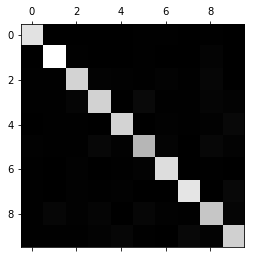

In [38]:
#calculate and get the confusing matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train,cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

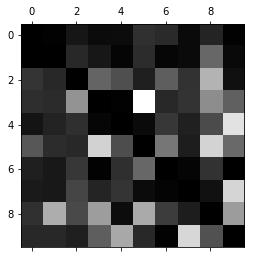

In [39]:
#rows represent actual classes, while columns represent predicted classes.
row_sums = conf_mx.sum(axis=1, keepdims=True)
#计算每一个class的错误率，错误率越高，颜色越浅
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

# 深入分析一下为什么3和5在当前的这个模型里边完全分不清楚
>

    cl_a, cl_b = 3, 5
    X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
    X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
    X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
    X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
    plt.figure(figsize=(8,8))
    plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
    plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
    plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5
    plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
    plt.show()

# Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)
print('y_train_large')
print(len(y_train_large))
print('y_train_odd')
print(len(y_train_odd))
print('y_multilabel')
print(y_multilabel)


In [41]:
knn_clf.predict([some_digit])

array([[False,  True]], dtype=bool)

# Measure the f1 score 

    This assumes that all labels are equally important, which may not be the case.
    In particular, if you have many more pictures of Alice than of Bob or Charlie,
    you may want to give more weight to the classifier’s score on pictures of
    Alice. One simple option is to give each label a weight equal to its support
    (i.e., the number of instances with that target label). To do this, simply set
    average="weighted" in the preceding code.4
    
    对于多种label的情况，如果想给某一个输入相关的输出更多的score,那么可以使用下面的代码来实现

In [42]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1=f1_score(y_train, y_train_knn_pred, average="macro")
print(f1)

KeyboardInterrupt: 

# Multioutput Classification
    这种实际上就是Multilabel Classification的一般情况。Multilabel Classification是有多个label，但是每一个label只有两种class(也就是只有两种可能值)。 Multioutput Classification就是针对前面的每一种label，可以支持有多个可能的值。

In [44]:
rnd = np.random
noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

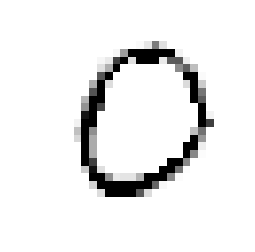

In [56]:
some_index = 5500
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
clean_digit=clean_digit.reshape(28, 28)
plt.imshow(clean_digit, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()